Load the required modules, assuming that they are already installed. We may initliaze a virtual envirment for the project but I skip it for now.

In [1]:
import pandas as pd
import numpy as np

Read the data into a dataframe

In [2]:
df_input = pd.read_csv("./DS_customer_data_sample.csv")

Investigate the data slightly

In [3]:
df_input.describe()

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,15446.000000,0.383838,12.308642,29.699118,0.523008,0.381594,64.408416
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,99.386857
min,15001.000000,0.000000,11.000000,0.420000,0.000000,0.000000,0.000000
25%,15223.500000,0.000000,12.000000,20.125000,0.000000,0.000000,15.820800
50%,15446.000000,0.000000,13.000000,28.000000,0.000000,0.000000,28.908400
75%,15668.500000,1.000000,13.000000,38.000000,1.000000,0.000000,62.000000
max,15891.000000,1.000000,13.000000,80.000000,8.000000,6.000000,1024.658400


In [4]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        891 non-null    int64  
 1   converted          891 non-null    int64  
 2   customer_segment   891 non-null    int64  
 3   gender             891 non-null    object 
 4   age                714 non-null    float64
 5   related_customers  891 non-null    int64  
 6   family_size        891 non-null    int64  
 7   initial_fee_level  891 non-null    float64
 8   credit_account_id  891 non-null    object 
 9   branch             889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [5]:
df_input

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
...,...,...,...,...,...,...,...,...,...,...
886,15887,0,12,male,27.0,0,0,26.0000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
887,15888,1,11,female,19.0,0,0,60.0000,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki
888,15889,0,13,female,NaN,1,2,46.9000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
889,15890,1,11,male,26.0,0,0,60.0000,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere


Cleaning data: Transform labels to number for categorical data, and handle null values, remove ID columns, remove outliers

In [6]:
from sklearn.preprocessing import LabelEncoder
df_transformed = df_input.copy()
df_transformed = df_transformed.drop(columns=["customer_id", "credit_account_id"])
df_transformed = df_transformed.dropna(subset=["branch", "age"])
df_transformed = df_transformed[df_transformed["initial_fee_level"] < 600]
df_transformed = df_transformed.reset_index(drop=True)
le_gender = LabelEncoder()
df_transformed["gender"] = df_transformed[["gender"]].apply(le_gender.fit_transform)
le_branch = LabelEncoder()
df_transformed["branch"] = df_transformed[["branch"]].apply(le_branch.fit_transform)

Now do some visualizations to invesitigate data

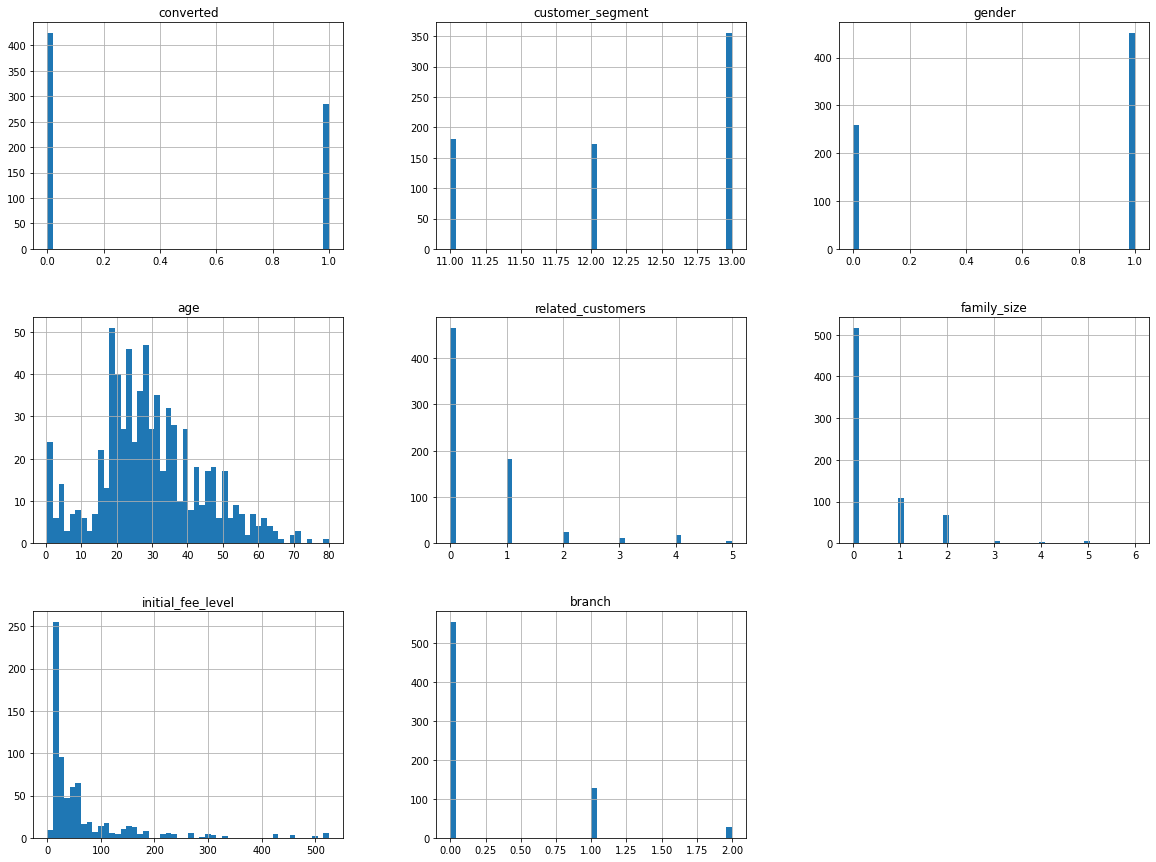

In [7]:
import matplotlib.pyplot as plt
df_transformed.hist(bins=50, figsize=(20, 15))
plt.show()

Investigating the correlation between factors

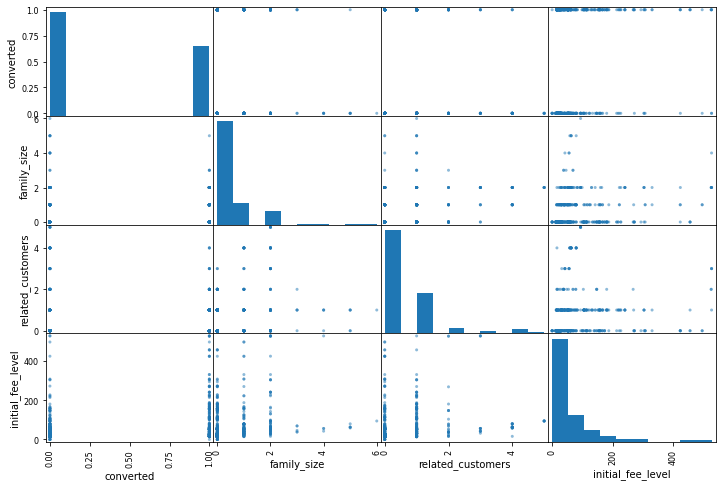

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_transformed[["converted", "family_size", "related_customers", "initial_fee_level"]], figsize=(12, 8));

Scale the data before performing a pca analysis.

In [9]:
features = ["customer_segment", "age", "gender", "related_customers", "family_size", "initial_fee_level", "branch"]
X = df_transformed.loc[:, features].values
y = df_transformed.loc[:, ['converted']].values
X_centered = X - X.mean(axis=0)

Do a PCA analysis to find the best feature. We can see that almost all data are in the first component! We get almost all data in direction one.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_centered)
print(pca.explained_variance_ratio_, "Total of two components", np.sum(pca.explained_variance_ratio_))

[0.9721584  0.02754684] Total of two components 0.9997052415340524


By looking at the component of pca, we can identify that is initial_fee_level is the main component for pca1 (age is the main component for pca2).

In [11]:
pca.components_

array([[-5.99676847e-03,  1.68036146e-02, -1.28154167e-03,
         2.15061149e-03,  2.59392847e-03,  9.99833901e-01,
         9.22693774e-04],
       [-1.76801426e-02,  9.99386311e-01,  4.08507048e-03,
        -2.12451374e-02, -1.27865428e-02, -1.68178537e-02,
        -1.87793206e-04]])

Now we will plot to make it more clear

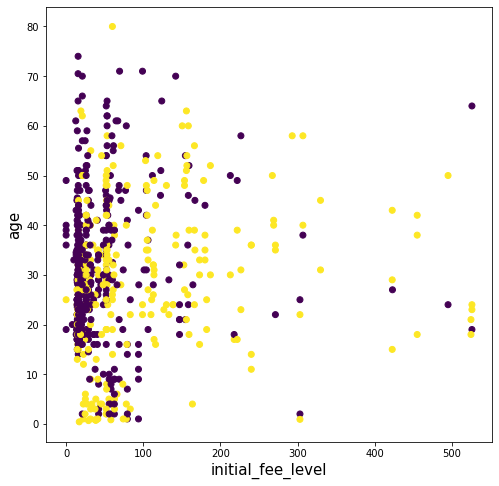

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
x = df_transformed["initial_fee_level"].values
y = df_transformed["age"].values
c = df_transformed["converted"].values
ax.scatter(x, y, c=c)
ax.set_xlabel('initial_fee_level', fontsize=15)
ax.set_ylabel('age', fontsize=15);

Make the pca dataframe and plot it

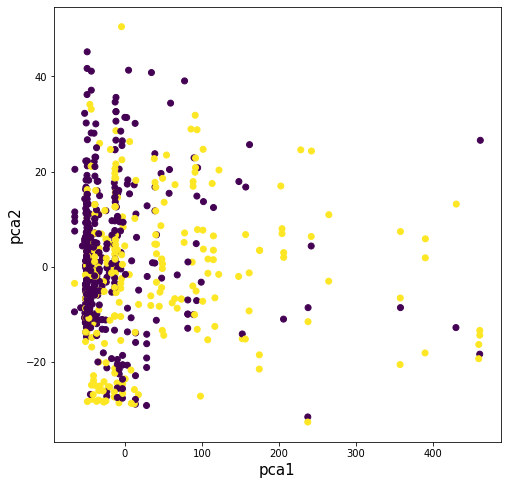

In [13]:
import matplotlib.pyplot as plt
df_pca = pd.DataFrame(data=X_2d, columns=["pca1", "pca2"])
df_pca = pd.concat([df_pca, df_transformed[['converted']]], axis = 1)
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
x = df_pca["pca1"].values
y = df_pca["pca2"].values
c = df_pca["converted"].values
ax.scatter(x, y, c=c)
ax.set_xlabel('pca1', fontsize=15)
ax.set_ylabel('pca2', fontsize=15);

We can also use sklearn SelectKBest, which confirms our selection using 

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(score_func=chi2, k=6)
X = df_transformed.loc[:, features].values
y = df_transformed.loc[:, ['converted']].values
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(features)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(4, 'Score'))

             Feature        Score
5  initial_fee_level  5949.165824
2             gender    75.195146
1                age    36.197379
4        family_size    11.078653


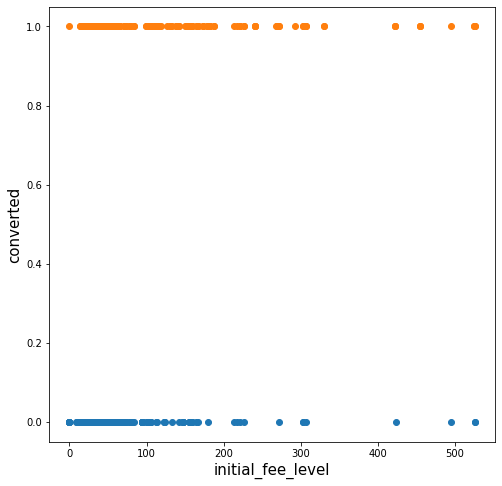

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
filt = df_transformed["converted"] == 0
x_0 = df_transformed.loc[filt, "initial_fee_level"].values
x_1 = df_transformed.loc[~filt, "initial_fee_level"].values
ax.scatter(x_0, np.zeros(x_0.shape))
ax.scatter(x_1, np.ones(x_1.shape))
ax.set_xlabel('initial_fee_level', fontsize=15)
ax.set_ylabel('converted', fontsize=15);

[0.11038908 0.27064267 0.27217278 0.04437268 0.04325885 0.23432898
 0.02483496]


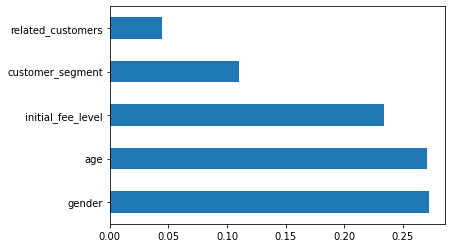

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df_transformed.loc[:, features].values
y = np.squeeze(df_transformed.loc[:, ["converted"]].values)
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

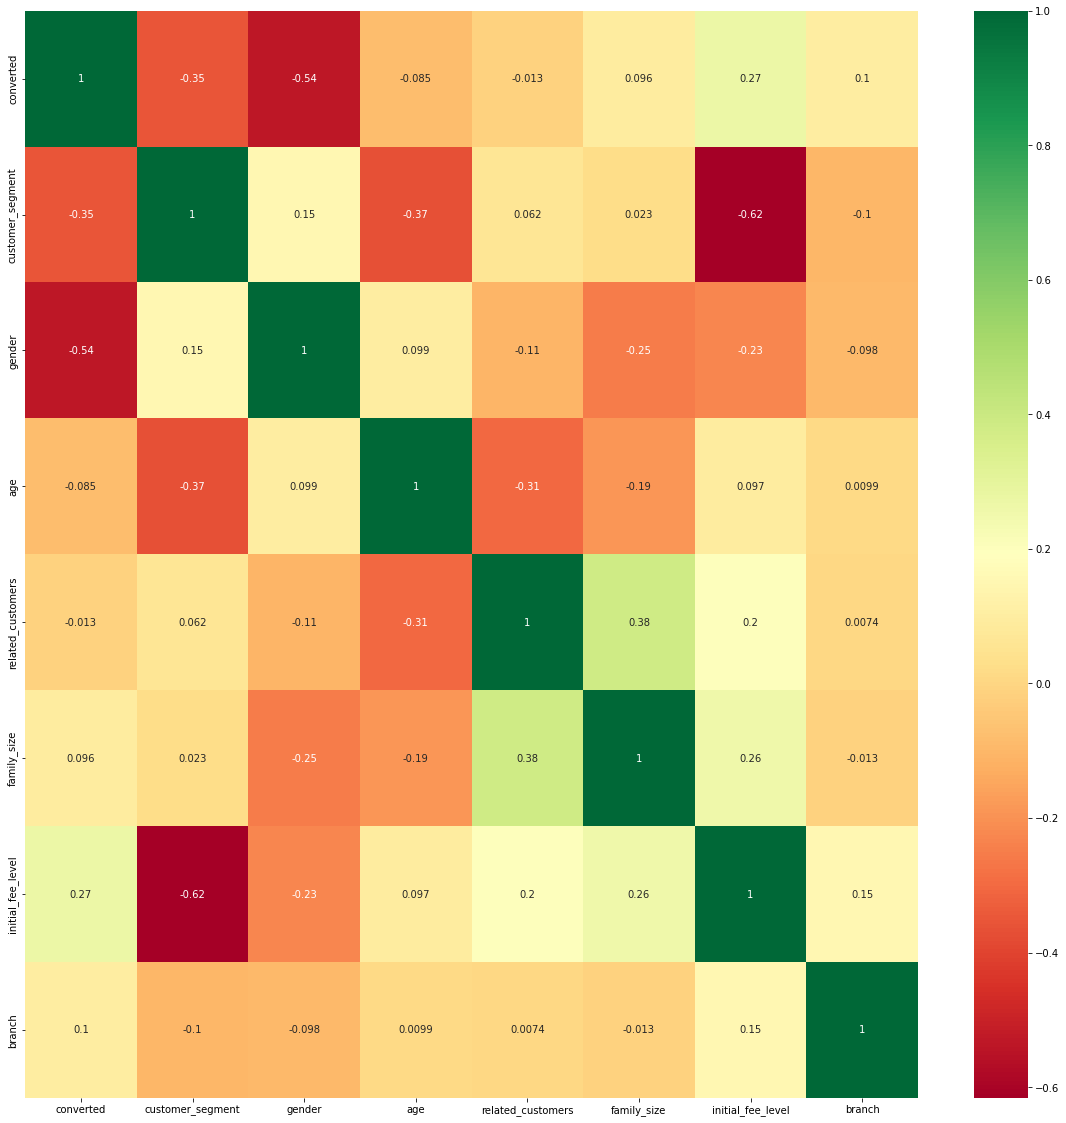

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
corrmat = df_transformed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
sns.heatmap(df_transformed[top_corr_features].corr(), annot=True, cmap="RdYlGn");

In [18]:
from sklearn.model_selection import train_test_split
X = df_transformed.loc[:, ["initial_fee_level"]].values
y = np.squeeze(df_transformed.loc[:, ["converted"]].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.62433862, 0.58730159, 0.58730159])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[325,   8],
       [219,  15]])

In [20]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred))

0.6521739130434783 0.0641025641025641
